In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [72]:
books = pd.read_csv('BX-Books.csv')
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
1,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
2,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group
3,0440234743,The Testament,John Grisham,1999,Dell
4,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume
...,...,...,...,...,...
18180,0375411615,"Love, Etc.",Julian Barnes,2001,Alfred A. Knopf
18181,0836227751,The Wit And Whimsy Of Mary Engelbreit,Mary Engelbreit,1997,Andrews McMeel Publishing
18182,8433966634,Los Detectives Salvajes,Roberto Bolano,2003,Anagrama
18183,0330353349,The Ice House (TV Tie-In Edition),Minette Walters,1997,McClelland & Stewart


In [73]:
books['Book-Author'].value_counts()

Book-Author
Stephen King      193
Nora Roberts      123
Anne McCaffrey     81
Danielle Steel     74
Piers Anthony      70
                 ... 
Tony Kushner        1
Greg Louganis       1
James Michener      1
Amitav Ghosh        1
Roberto Bolano      1
Name: count, Length: 6452, dtype: int64

In [74]:
books['Year-Of-Publication'].value_counts()

Year-Of-Publication
2002    1750
2001    1572
2003    1530
2000    1384
1999    1346
        ... 
1932       1
1929       1
1945       1
1927       1
1949       1
Name: count, Length: 70, dtype: int64

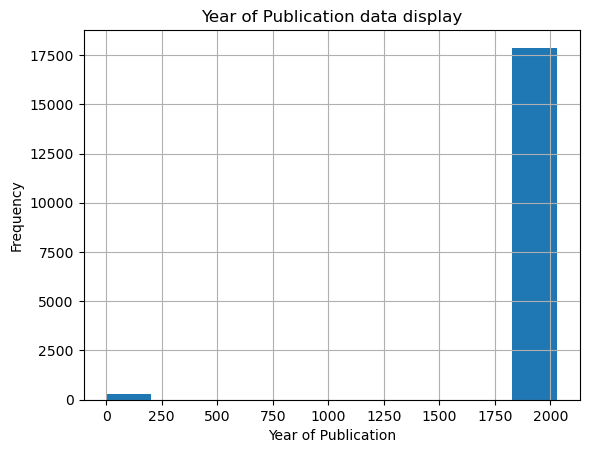

In [75]:
books['Year-Of-Publication'].hist(bins=10)

plt.title('Year of Publication data display')
plt.xlabel('Year of Publication')
plt.ylabel('Frequency')
plt.show()

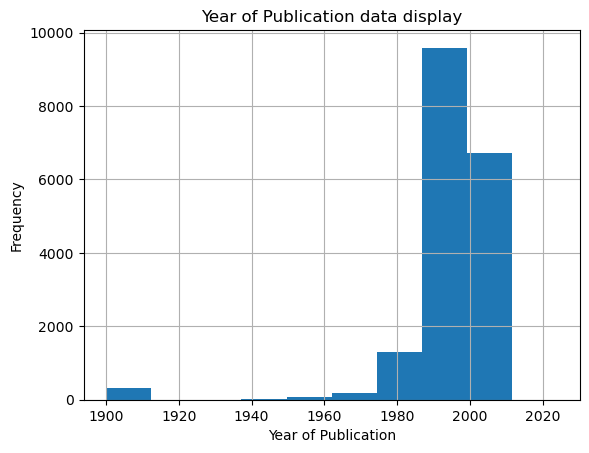

In [76]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].clip(upper=2024, lower=1900)

books['Year-Of-Publication'].hist(bins=10)

plt.title('Year of Publication data display')
plt.xlabel('Year of Publication')
plt.ylabel('Frequency')
plt.show()

In [77]:
# classify publication years into bins
bins = [1900, 1920, 1940, 1960, 1980, 2000, 2020]

books['Year-Of-Publication-Bin'] = pd.cut(books['Year-Of-Publication'], bins=bins, right=False)
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Year-Of-Publication-Bin
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"[2000, 2020)"
1,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,"[1980, 2000)"
2,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,"[1980, 2000)"
3,0440234743,The Testament,John Grisham,1999,Dell,"[1980, 2000)"
4,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,"[1980, 2000)"
...,...,...,...,...,...,...
18180,0375411615,"Love, Etc.",Julian Barnes,2001,Alfred A. Knopf,"[2000, 2020)"
18181,0836227751,The Wit And Whimsy Of Mary Engelbreit,Mary Engelbreit,1997,Andrews McMeel Publishing,"[1980, 2000)"
18182,8433966634,Los Detectives Salvajes,Roberto Bolano,2003,Anagrama,"[2000, 2020)"
18183,0330353349,The Ice House (TV Tie-In Edition),Minette Walters,1997,McClelland & Stewart,"[1980, 2000)"


In [78]:
# encode authors and publishers
label_encoder = LabelEncoder()

books['Book-Author-Encode'] = label_encoder.fit_transform(books['Book-Author'])
books['Book-Publisher-Encode'] = label_encoder.fit_transform(books['Book-Publisher'])
books['Year-Of-Publication-Bin-Encode'] = label_encoder.fit_transform(books['Year-Of-Publication-Bin'])

books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Year-Of-Publication-Bin,Book-Author-Encode,Book-Publisher-Encode,Year-Of-Publication-Bin-Encode
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"[2000, 2020)",5190,522,5
1,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,"[1980, 2000)",2169,406,4
2,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,"[1980, 2000)",240,952,4
3,0440234743,The Testament,John Grisham,1999,Dell,"[1980, 2000)",3079,287,4
4,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,"[1980, 2000)",6132,910,4
...,...,...,...,...,...,...,...,...,...
18180,0375411615,"Love, Etc.",Julian Barnes,2001,Alfred A. Knopf,"[2000, 2020)",3299,39,5
18181,0836227751,The Wit And Whimsy Of Mary Engelbreit,Mary Engelbreit,1997,Andrews McMeel Publishing,"[1980, 2000)",4234,63,4
18182,8433966634,Los Detectives Salvajes,Roberto Bolano,2003,Anagrama,"[2000, 2020)",5348,56,5
18183,0330353349,The Ice House (TV Tie-In Edition),Minette Walters,1997,McClelland & Stewart,"[1980, 2000)",4489,731,4


In [79]:
# deal with text data
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# def preprocess_text(text):
    #casefolding, remove non-letters, preposition words, lemmatization

    #text = str(text).lower()
    #letters = re.sub('[^a-zA-Z]', ' ', text)
    #tokens = word_tokenize(letters)
    #stop_words = set(stopwords.words('english'))
    #tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    #text = ' '.join(tokens)
    #return text


# Loop through each row in the DataFrame using index
#casefolding, remove non-letters, preposition words, lemmatization
for idx in books.index:
    text = str(books.loc[idx, 'Book-Title']).lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    processed_text = ' '.join(tokens)
    books.loc[idx, 'Book-Title'] = processed_text


# books['Book-Title'] = books['Book-Title'].apply(preprocess_text)
books['Book-Title']


0                                             clara callan
1        flu story great influenza pandemic search viru...
2                                         kitchen god wife
3                                                testament
4                       beloved plume contemporary fiction
                               ...                        
18180                                             love etc
18181                           wit whimsy mary engelbreit
18182                               los detective salvajes
18183                             ice house tv tie edition
18184          trouble business vintage crime black lizard
Name: Book-Title, Length: 18185, dtype: object

Text(0.5, 1.0, 'Word Cloud')

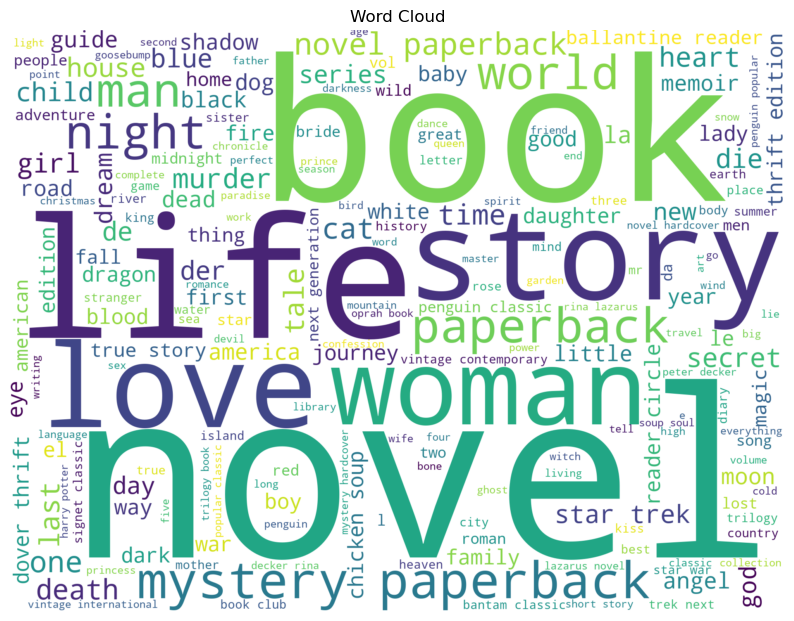

In [80]:
combined_txt = books['Book-Title']

wordcloud = WordCloud(width= 2000, height= 1500, background_color= 'white').generate(' '.join(combined_txt))

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')

In [81]:
# Define unwanted words with a regex pattern
pattern = r'\b(book|novel|story)\b'
# Apply regex to filter out unwanted words
books['Filtered-Title'] = books['Book-Title'].apply(lambda x: re.sub(pattern, '', x, flags=re.IGNORECASE).strip())

#books['Filtered-Title'] = books['Book-Title'].str.replace('books|novels', '', case=False, regex=True)


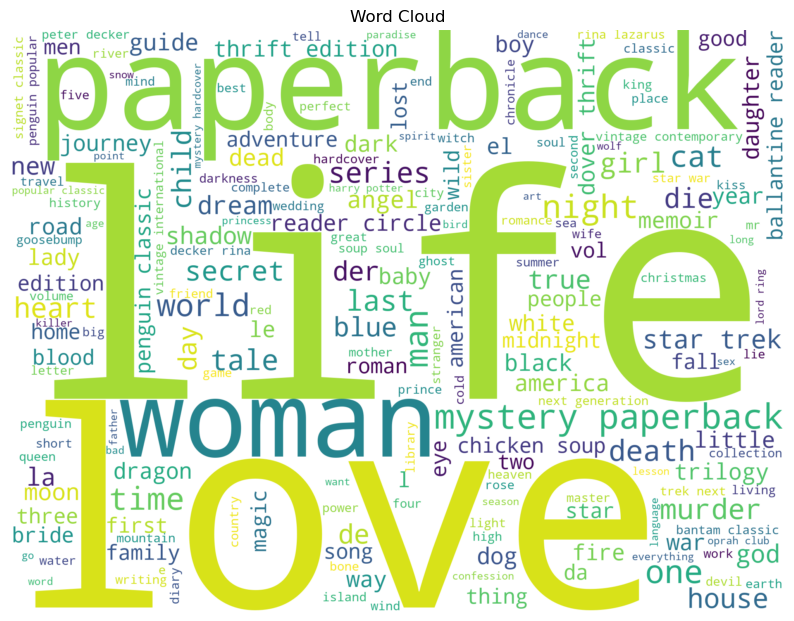

In [82]:
filtered_txt = books['Filtered-Title']
wordcloud = WordCloud(width=2000, height=1500, background_color='white').generate(' '.join(filtered_txt))
# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.title('Word Cloud')
plt.show()

In [83]:
books['Filtered-Title'] = books['Filtered-Title'].str.replace('paperback', '', case=False, regex=True)

print(books['Filtered-Title'])

0                                             clara callan
1        flu  great influenza pandemic search virus caused
2                                         kitchen god wife
3                                                testament
4                       beloved plume contemporary fiction
                               ...                        
18180                                             love etc
18181                           wit whimsy mary engelbreit
18182                               los detective salvajes
18183                             ice house tv tie edition
18184          trouble business vintage crime black lizard
Name: Filtered-Title, Length: 18185, dtype: object


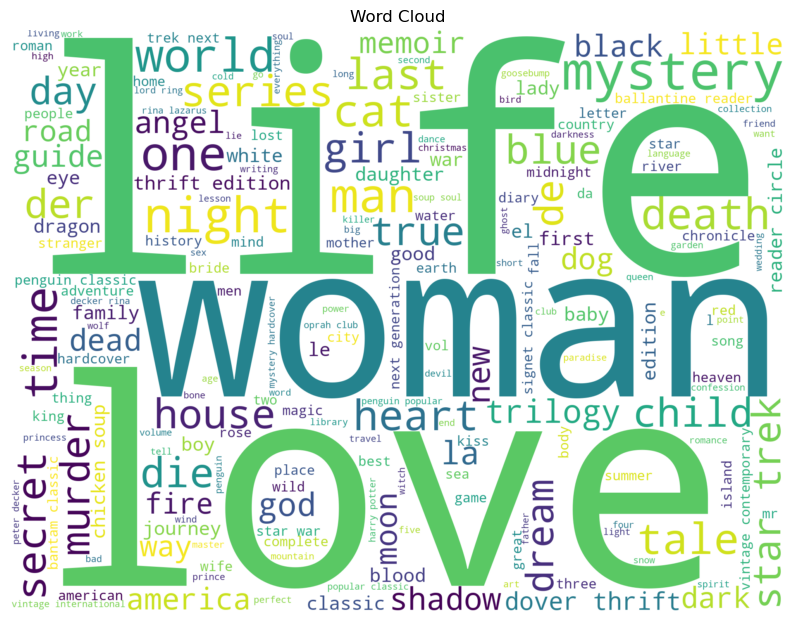

In [84]:
filtered_txt = books['Filtered-Title']
wordcloud = WordCloud(width=2000, height=1500, background_color='white').generate(' '.join(filtered_txt))
# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.title('Word Cloud')
plt.show()

In [85]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
# Tokenize book titles
tokenized_titles = [title.split() for title in books['Book-Title']+books['Book-Author']+books['Book-Publisher']]

# Train Word2Vec model
model = Word2Vec(sentences=tokenized_titles, vector_size=1000, window=5, min_count=1, workers=4)
# Get Word2Vec embeddings for each title
embeddings=[]
for title in tokenized_titles:
    title_embeddings = [model.wv[word] for word in title if word in model.wv]
    if title_embeddings:
        embeddings.append(np.mean(title_embeddings,axis=0))
    else:
        embeddings.append(np.zeros(100)) #Handle out-of-vocabulary words

# Convert embeddings list to DataFrame
word2vec_df = pd.DataFrame(embeddings)

# Initialize PCA with 1 components
pca = PCA(n_components=1)

# Fit PCA to Word2Vec embeddings
pca.fit(word2vec_df)

# Transform Word2Vec embeddings to 50 dimensions
word2vec_df_pca = pca.transform(word2vec_df)

# Calculate the percentage of variance explained by each component
pct_var_explained = pca.explained_variance_ratio_
print(f"\nTotal percentage of variance explained by {len(pct_var_explained)} components: {sum(pct_var_explained)*100:.2f}%")
books.to_csv('cleaned_books.csv', index=False)


Total percentage of variance explained by 1 components: 99.25%
